In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(context='talk',style='white',palette='colorblind')
import matplotlib
from scipy import sparse
import sklearn
import sklearn.mixture
from sklearn.manifold import TSNE
import scipy as sp
from sklearn.cluster import KMeans

In [3]:
dt = pd.read_csv("./data/words_pos.csv")

In [4]:
dt.head()

,Unnamed: 0,word,pos_tag
0,0,aa,NN
1,1,aaa,NN
2,2,aah,NN
3,3,aahed,VBN
4,4,aahing,VBG


In [26]:
dt1 = dt.head()
cols = [i for i in "abcdefghijklmnopqrstuvwxyz"]
cols

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [21]:
def create_dataset(df):
    for letter in "abcdefghijklmnopqrstuvwxyz":
        df[letter] = df["word"].apply(lambda x: x.count(letter))

    return df

In [22]:
dt = create_dataset(dt)

In [163]:
def plot_tsne(tsne_results, clusters, labels=[''],color="#4532c2"):
    '''Plotting function for tsne results, creates one or multiple plots of tSNE-transformed data.
       If the clustering is the original one (default), original cluster colors will be used. Otherwise,
       colors will be a random permutation.
    
    input:
        tsne_results: (n,2)-shaped array containing tSNE-transformed data or list of such arrays
                      (output of the fit_transform function of sklearn tSNE)
        clusters: (n,)-shaped array containing cluster labels or list of such arrays
        labels: optional, list of titles for the subplots
    '''
    
    if type(tsne_results)==list: # make sure we can do both single and multiple plots and are flexible regarding input
        num_plots = len(tsne_results)
    else:
        num_plots = 1
        tsne_results = [tsne_results]
    if type(clusters)==list:
        num_clusters = len(clusters)
        num_plots = num_plots * num_clusters
        tsne_results = tsne_results * num_clusters
    else:
        clusters = [clusters]*num_plots
    
    if len(labels)==1:
        labels = labels*num_plots
        
    n_clusters = len(np.unique(clusters))      # ensure a long enough color list even if we plot more than 
    """ n_colors = len(tasic_1k['clusterColors'])  # the original number of clusters
    if n_clusters > n_colors:
        n_extra_colors = n_clusters - n_colors
        colors = np.concatenate((tasic_1k['clusterColors'],tasic_1k['clusterColors'][:n_extra_colors]))    
    else:
        colors = tasic_1k['clusterColors']"""

    fig, ax = plt.subplots(num_plots,1,figsize=(10,num_plots*10))
    if num_plots==1:
        """        if not np.all(tasic_1k['clusters']==clusters[0]):
            current_colors = np.random.permutation(colors)
        else:
            current_colors = colors"""
        ax.scatter(tsne_results[0][:,0], tsne_results[0][:,1], s=3, color=color)
        ax.set_title(labels[0])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_axis_off()
    else:
        for i in range(num_plots):
            """if not np.all(tasic_1k['clusters']==clusters[i]):
                current_colors = np.random.permutation(colors)
            else:
                current_colors = colors"""
            ax[i].scatter(tsne_results[i][:,0], tsne_results[i][:,1], s=3, color=color)
            ax[i].set_title(labels[i])
            ax[i].set_xticks([])
            ax[i].set_yticks([])
            ax[i].set_axis_off()
            
            

In [222]:
def sample(df,n,y_name="pos_tag"):
    """Return a random sample of data"""
    idx = [i for i in range(len(df))]
    np.random.shuffle(idx)
    idx = idx[:n]
    X = df[cols].values[idx,:]
    y = df[y_name].values[idx]
    return y, X, df["word"].values[idx]

In [223]:
y, X, words = sample(dt[dt["pos_tag"]!="NN"],15000)

In [224]:
tsne_results = TSNE(perplexity=300,early_exaggeration=300).fit_transform(X)

/Users/dennisperrett/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/dennisperrett/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


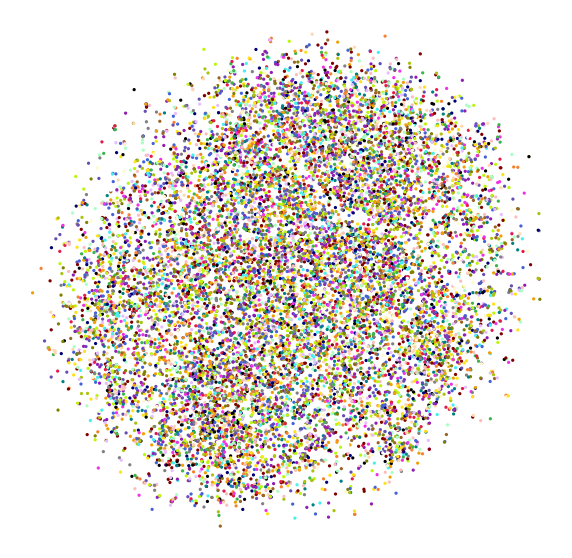

In [225]:
plot_tsne(tsne_results,labels,color=colors_ordered)

In [123]:
colours = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000','#654eb4','#a9c30f','#f09f09']

In [139]:
label_colors = np.array([dt["pos_tag"].unique(),colours])

# Color by tag

In [198]:
c_dic = {}
for i, val in enumerate(label_colors[0]):
    c_dic[val] = label_colors[:,i][1]
    
colors_ordered = []
for tag in y:
    #idx = min(len(word),24)
    colors_ordered.append(c_dic[tag])

# Color by length

In [208]:
c_dic = {}
for i, val in enumerate(label_colors[0]):
    c_dic[i] = label_colors[:,i][1]
    
colors_ordered = []
for word in y:
    idx = min(len(word),24)
    colors_ordered.append(c_dic[idx])

# Colour by Kmeans

In [230]:
c_dic = {}
for i, val in enumerate(label_colors[0]):
    c_dic[i] = label_colors[:,i][1]
    
colors_ordered = []
for cluster in k_means_res.labels_:
    colors_ordered.append(c_dic[cluster])

In [226]:
k_means_res = KMeans(25, random_state=0).fit(X)

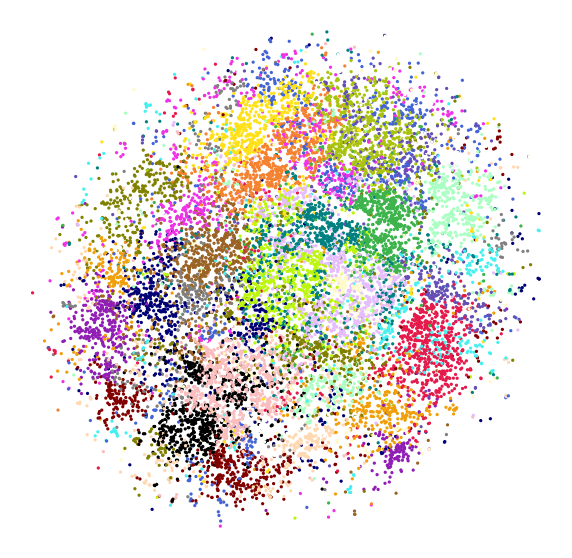

In [231]:
plot_tsne(tsne_results,k_means_res.labels_,color=colors_ordered)

In [236]:
df_res = pd.DataFrame(X,columns=cols)
df_res["cluster"] = k_means_res.labels_
df_res["Word"] = words

In [241]:
df_res[df_res["cluster"]==2]

,a,b,c,d,e,f,g,h,i,j,...,s,t,u,v,w,x,y,z,cluster,Word
5,0,1,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,2,unbronzed
46,2,2,1,2,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,2,unscabbarded
55,1,0,0,2,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,2,unsanded
74,0,0,1,2,1,1,0,0,0,0,...,0,0,2,0,0,0,0,0,2,unconfounded
78,0,0,0,2,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,2,woundedly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14893,2,0,1,1,2,0,0,0,0,0,...,0,2,1,0,0,0,0,0,2,uncatenated
14916,0,0,0,1,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,2,unliked
14939,1,0,0,2,3,0,0,0,0,0,...,0,1,1,0,0,0,0,0,2,underteamed
14956,0,0,2,2,1,0,0,0,2,0,...,0,0,1,0,0,0,0,0,2,uncoincided


In [239]:
c_dic

{0: '#e6194b',
 1: '#3cb44b',
 2: '#ffe119',
 3: '#4363d8',
 4: '#f58231',
 5: '#911eb4',
 6: '#46f0f0',
 7: '#f032e6',
 8: '#bcf60c',
 9: '#fabebe',
 10: '#008080',
 11: '#e6beff',
 12: '#9a6324',
 13: '#fffac8',
 14: '#800000',
 15: '#aaffc3',
 16: '#808000',
 17: '#ffd8b1',
 18: '#000075',
 19: '#808080',
 20: '#ffffff',
 21: '#000000',
 22: '#654eb4',
 23: '#a9c30f',
 24: '#f09f09'}